In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") #to ignore warnings


In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [3]:
%matplotlib inline

In [4]:
train=pd.read_csv('train.csv')

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
train.shape

(614, 13)

In [9]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

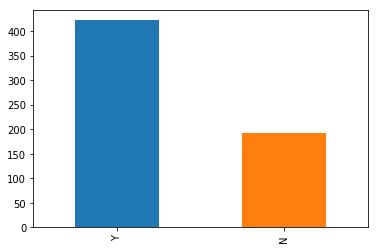

In [11]:
train['Loan_Status'].value_counts().plot.bar()

In [12]:
target=train['Loan_Status']

In [13]:
target.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [14]:
train.drop('Loan_Status',axis=1,inplace=True)

In [15]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [16]:
train['Gender'].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [17]:
train['Married'].value_counts(normalize=True)

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

In [18]:
train['Dependents'].value_counts(normalize=True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

In [19]:
train['Education'].value_counts(normalize=True)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

In [20]:
train['Self_Employed'].value_counts(normalize=True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

In [21]:
train['Credit_History'].value_counts(normalize=True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

In [22]:
train['Property_Area'].value_counts(normalize=True)

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

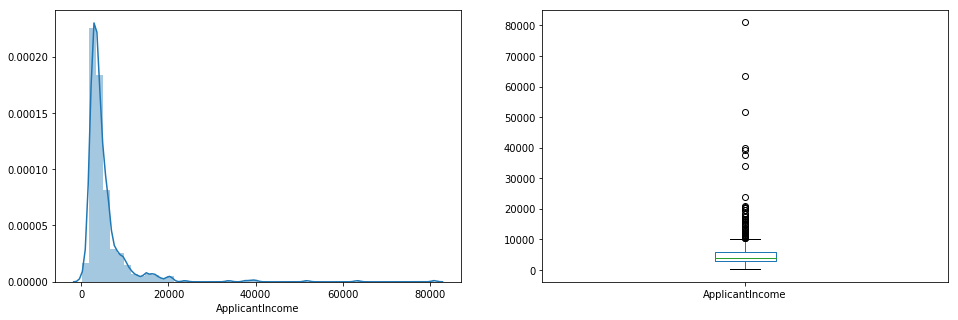

In [23]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()


Text(0.5,0.98,'')

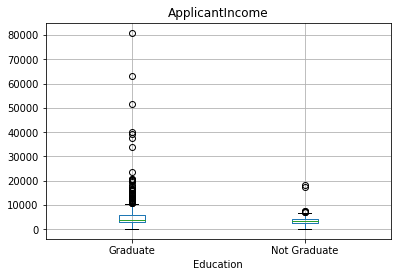

In [24]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle('')

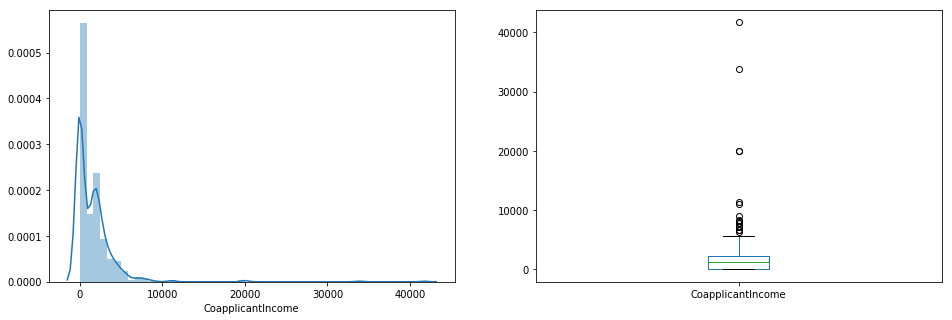

In [25]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5,0.98,'')

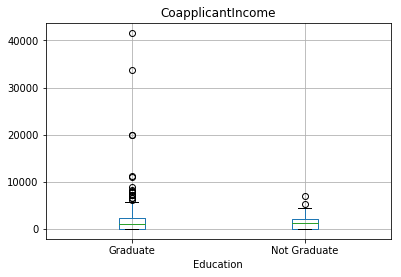

In [26]:
train.boxplot(column='CoapplicantIncome',by='Education')
plt.suptitle('')

In [27]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)

In [28]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [29]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [30]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [31]:
train.drop('Loan_ID',axis=1,inplace=True)

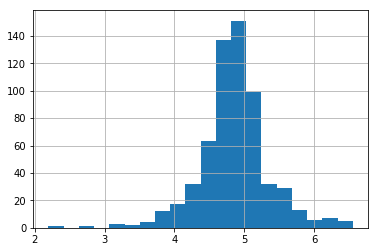

In [32]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 


In [33]:
train=pd.get_dummies(train)

In [34]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [35]:
train=pd.get_dummies(train)

In [36]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [37]:

X_train, X_val, y_train, y_val = train_test_split(train, target,test_size=0.2)

In [38]:
model = LogisticRegression() 
model.fit(X_train, y_train)
model.score(X_val,y_val)

0.8130081300813008

In [39]:
grid_values = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid_clf_acc = GridSearchCV(model, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameter
grid_clf_acc.score(X_val,y_val)

0.8130081300813008

In [40]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome'] 


In [41]:
train['Total_Income_log'] = np.log(train['Total_Income']) 



In [42]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 



In [43]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000) 


In [44]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,0,1,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,0,6091.0,8.714568,0.355556,5735.444444
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,0,0,1,0,0,1,3000.0,8.006368,0.183333,2816.666667
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,1,0,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,0,1,0,0,0,1,6000.0,8.699515,0.391667,5608.333333


In [45]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(train, target,test_size=0.2)

In [46]:
model.fit(X_train1, y_train1)
model.score(X_val1,y_val1)

0.8373983739837398

In [47]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 


In [48]:
X_train2, X_val2, y_train2, y_val2 = train_test_split(train, target,test_size=0.2)

In [49]:
model.fit(X_train2, y_train2)
model.score(X_val2,y_val2)

0.7479674796747967

In [50]:
grid_values = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid_clf_acc = GridSearchCV(model, param_grid = grid_values)
grid_clf_acc.fit(X_train2, y_train2)

#Predict values based on new parameter
grid_clf_acc.score(X_val2,y_val2)

0.7479674796747967